# **Project 2**, APS1070 Fall 2024
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Oct 25th, 11 PM - 13 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Mengyang Liu

##**Marking Scheme:**

This project is worth **13 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Check that the completed `.ipynb` file runs correctly when using `Runtime -> Run All`.

2. Download your notebook: `File -> Download .ipynb`

3. Click on the Files icon on the far left menu of Colab

4. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


5. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

6. An HTML version of your notebook will appear in the files, so you can download it.

7. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 2 [13 Marks]

## **Part 1: Getting started [1.5 Marks]**

We are going to work with the [Thyroid Disease](https://odds.cs.stonybrook.edu/thyroid-disease-dataset/) dataset. This dataset contains 6 clinical attributes to determine whether a patient referred to the clinic is hypothyroid.

 The dataset is called `Thyroid_Disease.csv`. Load the dataset in CSV file using Pandas and name it `df`. Print out the first few columns of the dataset.


* How many rows are there? 3772 **[0.1]**
* Which column contains the targets? The last column named "hypothyroid" **[0.1]**
* To what do the target values correspond? 0 represents the absence of hypothyroid, 1 represents the presence of hypothyroid **[0.2]**

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/Thyroid_Disease.csv')

'Thyroid_Disease (1).csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
### YOUR CODE HERE ###
thyroid_data = pd.read_csv(r'C:\Frank\UoT 2024-2025\APS1070\P2\Thyroid_Disease.csv')
df = thyroid_data.drop(columns=['Unnamed: 0'])
df.head()

,Attribute0,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,hypothyroid
0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066,0.0
1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770,0.0
2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590,0.0
3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066,0.0
4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541,0.0


In [5]:
df

,Attribute0,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,hypothyroid
0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066,0.0
1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770,0.0
2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590,0.0
3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066,0.0
4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541,0.0
...,...,...,...,...,...,...,...
3767,0.817204,0.000113,0.190702,0.287383,0.413146,0.188525,0.0
3768,0.430108,0.002453,0.232448,0.287383,0.446009,0.175410,0.0
3769,0.935484,0.024528,0.160342,0.282710,0.375587,0.200000,0.0
3770,0.677419,0.001472,0.190702,0.242991,0.323944,0.195082,0.0


In [6]:
thyroid_data['hypothyroid'].unique()

array([0., 1.])

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? The percentage for class of absence of hypothyroid is 97.534463% and for class of presence of hypothyroid is 2.465536% **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? 
The data is considered unbalanced because there is a significant disparity between the two classes, but in a balanced dataset, we would expect the two classes to have a more even distribution. **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? **[0.2]**
In an imbalanced datasets where one class significantly outweighs the other, a model can be biased towards the majority class and misleading the evaluation. For example, KNN is likely to encounter more samples from the majority class within the k nearest neighbors. A KNN classifier will  predict the majority class with uneven proportion, leading to poor performance in identifying the minority class.


In [7]:
### YOUR CODE HERE ###
class_counts = thyroid_data['hypothyroid'].value_counts(normalize=True)*100
class_counts


hypothyroid
0.0    97.534464
1.0     2.465536
Name: proportion, dtype: float64

Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [8]:
### Split the data  ###
feature_data = df.drop(columns=['hypothyroid'])
target_data = df['hypothyroid']
X_t, X_test, y_t, y_test = train_test_split(feature_data, target_data, test_size=0.15, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.1765, random_state=0)


Now, let's take a look at the difference in distribution for some variables between hypothyroid and not-hypothyroid patients:

Attribute0
Attribute1
Attribute2
Attribute3
Attribute4
Attribute5


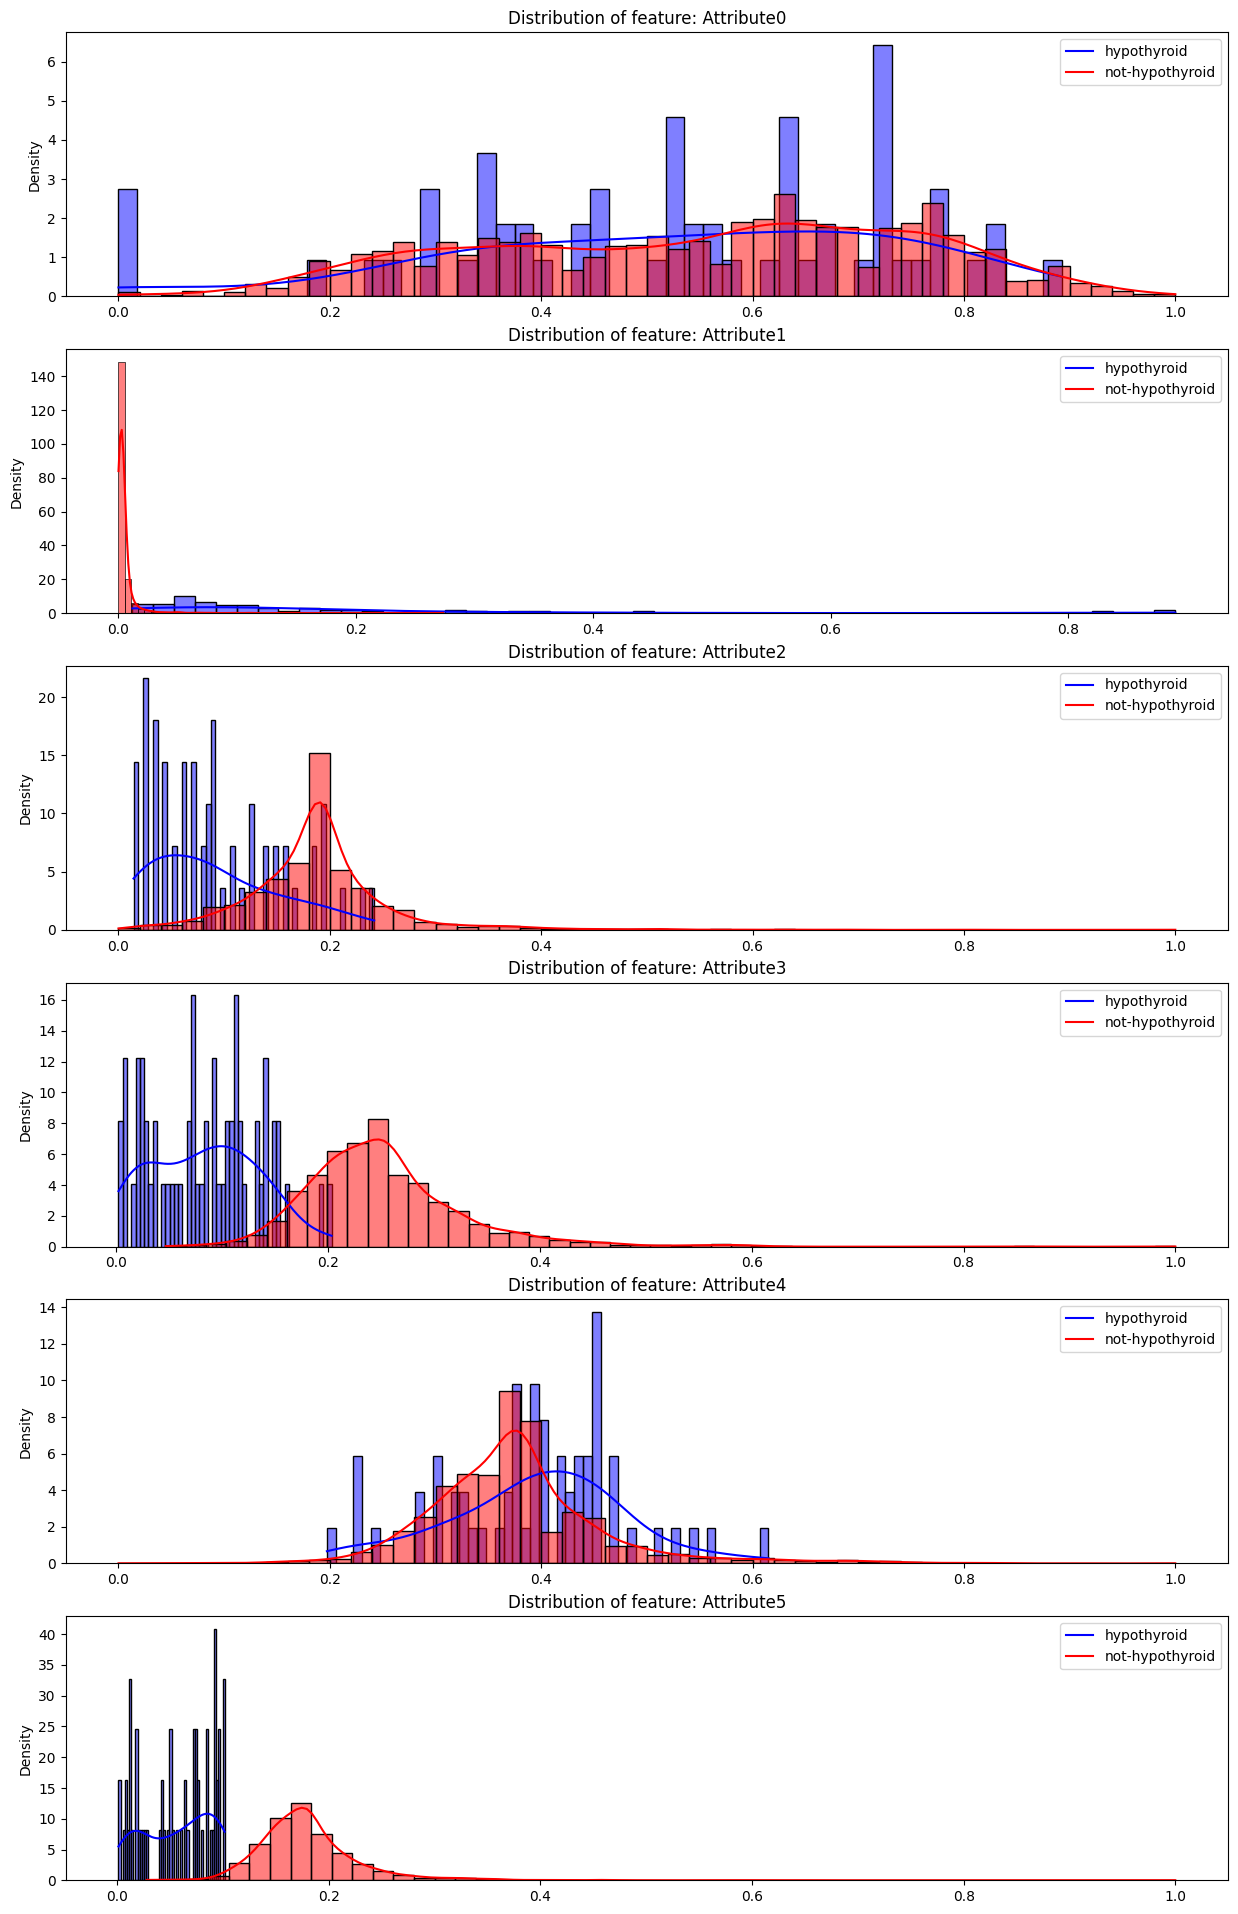

In [9]:
import matplotlib.gridspec as gridspec
features=list(df.columns[:-1])
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['hypothyroid', 'not-hypothyroid'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

These graphs provide a visual indication of how features differ between hypothyroid and non-hypothyroid cases. Features where hypothyroid data deviates significantly from Gaussian distribution are useful because they help the model identify unexpectation. The graph of feature "Attribute 0" has shown a pattern that the hypothyroid case and non case are not clearly deviated. This indicates this feature is not a not ideal for anomaly detection. The graph of features "Attribute 1,2,3,5" show cases for anomaly detection because hypothyroid and non-hypothyroid cases are clearly differentiated by these features. The significant deviation of hypothyroid data from the non-hypothyroid pattern makes it a useful feature for anomaly-based classification. The graph for "Attribute 4" also shows clear differences between the two classes, but it doesn't show significant deviations like the other ones. In this case, "Attribute 4" need further analysis later.

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish hypothyroid patients from not-hypothyroid patients based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that patient as hypothyroid. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-hypothyroid patients** (instead of all the patients).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [173]:
### YOUR CODE HERE ###

# Part 2a
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

results = []
for feature in X_train.columns:
    train_data = X_train[[feature]].values
    val_data = X_valid[[feature]].values
    
    gm = GaussianMixture(n_components=1, random_state=0)
    gm.fit(train_data)
    
    train_scores = gm.score_samples(train_data) 
    val_scores = gm.score_samples(val_data) 
    
    train_auc = roc_auc_score(y_train, -1 * train_scores) ### *-1
    val_auc = roc_auc_score(y_valid, -1 * val_scores) ### *-1
    
    results.append({
        'Feature': feature,
        'Train AUC': train_auc,
        'Validation AUC': val_auc
    })

result_table = pd.DataFrame(results)
result_table

,Feature,Train AUC,Validation AUC
0,Attribute0,0.475330,0.361781
1,Attribute1,0.950324,0.996411
2,Attribute2,0.804881,0.840137
3,Attribute3,0.938784,0.949212
4,Attribute4,0.583254,0.646898
5,Attribute5,0.963453,0.976803


The features Attribute1, Attribute3 and Attribute5 show the highest AUC scores on the validation set, indicating they are the most effective in distinguishing between hypothyroid and non-hypothyroid patients based on the Gaussian model's performance.

In [175]:
from sklearn.metrics import f1_score

# Define a function to identify the optimal threshold based on F1 score
def Optimal_threshold(feature, X_train, X_valid, y_valid):
    train_data = X_train[[feature]].values
    val_data = X_valid[[feature]].values

    gm = GaussianMixture(n_components=1, random_state=0)
    gm.fit(train_data)
    
    train_scores = gm.score_samples(X_train[[feature]].values) # Compute the log likelihood score for the train set
    val_scores = gm.score_samples(val_data) # Compute the log likelihood score for the validation set

    train_auc = roc_auc_score(y_train, -1 * train_scores)
    val_auc = roc_auc_score(y_valid, -1 * val_scores)

    best_f1 = 0
    best_threshold = None
    threshold_range = np.arange(-10, 10.1, 0.01).tolist() # Make potential threshold range between -10 and 10 with 2 decimal.
    for threshold in threshold_range:
        f1 = f1_score(y_valid, val_scores < threshold) # Make predictions: score less than threshold means hypothyroid (1), otherwise not-hypothyroid (0)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return train_auc, val_auc, best_threshold, best_f1

# Store the best three feature
top_features = ['Attribute1', 'Attribute3', 'Attribute5']

# Find the optimal threshold for each of the top 3 features
threshold_result = []
for feature in top_features:
    train_auc, val_auc, best_threshold, best_f1 = Optimal_threshold(feature, X_train, X_valid, y_valid)
    threshold_result.append({
        'Feature': feature,
        '2a Best Threshold': best_threshold,
        '2a Best F1 Score': best_f1,
        '2a Train AUC': train_auc,
        '2a Validation AUC': val_auc
    })

optimal_thresholds_df = pd.DataFrame(threshold_result)
optimal_thresholds_df


,Feature,2a Best Threshold,2a Best F1 Score,2a Train AUC,2a Validation AUC
0,Attribute1,0.59,0.866667,0.950324,0.996411
1,Attribute3,-1.18,0.500000,0.938784,0.949212
2,Attribute5,-0.43,0.571429,0.963453,0.976803


When fitting the Gaussian Mixture Model: Let n be the number of data points in the training set, i be the number of iterations and k is the number of components (1 in this case). It is O(n * i). The process of getting score sample for the validation set  is O(m) where m is the number of data in teh validation set. The for loop after then is O(t * m) where t is the number of possible threshold number, and there are m * t pairs of comparison in total. Therefore, my method is O(n * i)+ O(m)+ O(t * m) = O(n * i + c * m) where C is a constant.

In [176]:
# Part 2b

top_features = ['Attribute1', 'Attribute3', 'Attribute5']

# Define a function to identify the optimal threshold for non-hypo only based on AUC and F1 score
def Optimal_threshold_nonhypo(feature, X_train, X_valid, y_valid):
    nonhypo_train= X_train[y_train == 0][[feature]].values
    val_data = X_valid[[feature]].values

    gm = GaussianMixture(n_components=1, random_state=0)
    gm.fit(nonhypo_train)

    train_scores = gm.score_samples(X_train[[feature]].values) # Compute the log likelihood score for the train set
    val_scores = gm.score_samples(val_data) # Compute the log likelihood score for the validation set

    train_auc = roc_auc_score(y_train, -1 * train_scores)
    val_auc = roc_auc_score(y_valid, -1 * val_scores)

    best_f1 = 0
    best_threshold = None
    threshold_range = np.arange(-10, 10.1, 0.01).tolist() # Make potential threshold range between -10 and 10 with 2 decimal.
    for threshold in threshold_range:
        f1 = f1_score(y_valid, val_scores < threshold) # Make predictions: score less than threshold means hypothyroid (1), otherwise not-hypothyroid (0)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return train_auc, val_auc, best_threshold, best_f1

# Find the optimal threshold for each of the top 3 features
threshold_result2 = []
for feature in top_features:
    train_auc, val_auc, best_threshold, best_f1 = Optimal_threshold_nonhypo(feature, X_train, X_valid, y_valid)
    threshold_result2.append({
        'Feature': feature,
        '2b Best Threshold': best_threshold,
        '2b Best F1 Score': best_f1,
        '2b Train AUC': train_auc,
        '2b Validation AUC': val_auc
    })

optimal_thresholds_df2= pd.DataFrame(threshold_result2)
optimal_thresholds_df2


,Feature,2b Best Threshold,2b Best F1 Score,2b Train AUC,2b Validation AUC
0,Attribute1,-10.00,0.866667,0.990459,0.996411
1,Attribute3,-0.74,0.520000,0.942896,0.952641
2,Attribute5,-0.15,0.590909,0.966333,0.980017


In [177]:
# Combine the two generated table from 2a and 2b
combined_df = pd.merge(optimal_thresholds_df, optimal_thresholds_df2, on='Feature')
combined_df

,Feature,2a Best Threshold,2a Best F1 Score,2a Train AUC,2a Validation AUC,2b Best Threshold,2b Best F1 Score,2b Train AUC,2b Validation AUC
0,Attribute1,0.59,0.866667,0.950324,0.996411,-10.00,0.866667,0.990459,0.996411
1,Attribute3,-1.18,0.500000,0.938784,0.949212,-0.74,0.520000,0.942896,0.952641
2,Attribute5,-0.43,0.571429,0.963453,0.976803,-0.15,0.590909,0.966333,0.980017


The results across parts 2a and 2b are generally similar. For all three features, both the Validation AUC and F1 Scores remain unchanged or only slightly different. Since the features are likely not having high differences between hypothyroid and non-hypothyroid patients, the model's ability to fit and distinguish the data does not change much when switching from the full dataset to just the non-hypothyroid patients. Also, a single-component Gaussian model may not be sensitive enough to pick up variations in distributions, so restricting the training data does not change its behavior much.

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components of the GM model.

  a. 2D plot:
 1. Pick two features (say, Attribute1 and Attribute2).
 2. Scatter plot (plt.scatter) those features on a figure (Attribute1 on the x-axis and Attribute2 on the y-axis).
 3. Color the data points based on their class (not-hypothyroid blue and hypothyroid red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on not-hypothyroid patients). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





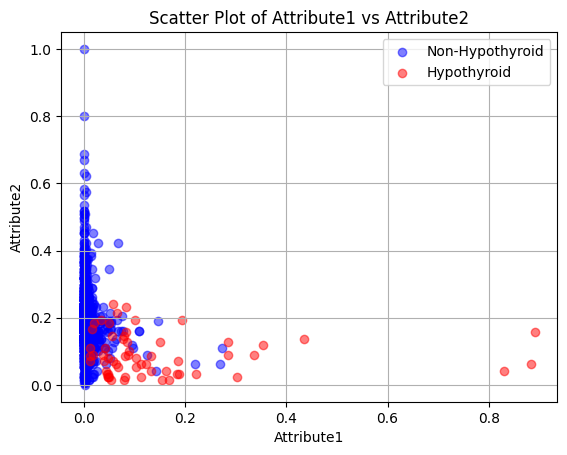

Training AUC: 0.9354
Validation AUC: 0.9571
Best Threshold for Validation F1 Score: -10.0000
Best F1 Score on Validation Set: 0.6667


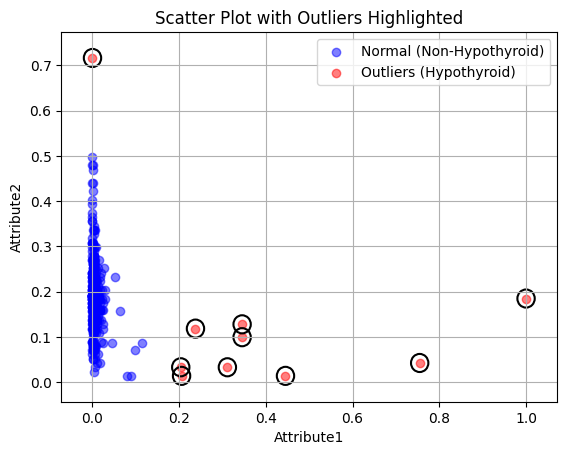

In [214]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

# Select the two features for plotting
feature_x = 'Attribute1'
feature_y = 'Attribute2'

# Scatter plot
plt.scatter(X_train[feature_x][y_train == 0], X_train[feature_y][y_train == 0], color='blue', label='Non-Hypothyroid', alpha=0.5)
plt.scatter(X_train[feature_x][y_train == 1], X_train[feature_y][y_train == 1], color='red', label='Hypothyroid', alpha=0.5)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Scatter Plot of {feature_x} vs {feature_y}')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


features = ['Attribute1', 'Attribute2']
train_data = X_train[features].values
val_data = X_valid[features].values

gm = GaussianMixture(n_components=1, random_state=0) # based on the scatter plot analysis
gm.fit(train_data)
train_scores = gm.score_samples(train_data)
val_scores = gm.score_samples(val_data)
train_auc = roc_auc_score(y_train, -1  * train_scores)
val_auc = roc_auc_score(y_valid, -1 * val_scores)

best_f1 = 0
best_threshold = None
threshold_range = np.arange(-10, 10.1, 0.01).tolist() # Make potential threshold range between -10 and 10 with 2 decimal.
for threshold in threshold_range:
    f1 = f1_score(y_valid, val_scores < threshold) # Make predictions: score less than threshold means hypothyroid (1), otherwise not-hypothyroid (0)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Training AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")
print(f"Best Threshold for Validation F1 Score: {best_threshold:.4f}")
print(f"Best F1 Score on Validation Set: {best_f1:.4f}")

outlier_preds = (val_scores < best_threshold).astype(int)
normal_data = val_data[outlier_preds == 0]
outlier_data = val_data[outlier_preds == 1]

plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', label='Normal (Non-Hypothyroid)', alpha=0.5)
plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', label='Outliers (Hypothyroid)', alpha=0.5)
for point in outlier_data:
    plt.gca().add_patch(plt.Circle((point[0], point[1]), 0.02, color='black', fill=False, lw=1.5))

plt.xlabel('Attribute1')
plt.ylabel('Attribute2')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

The scatter plot indicates that the non-hypothyroid data is primarily concentrated in a single region near the origin, with no clear signs of multiple distinct groups. Therefore, using n_components = 1 is appropriate when fitting the Gaussian model for non-hypothyroid patients in this case.

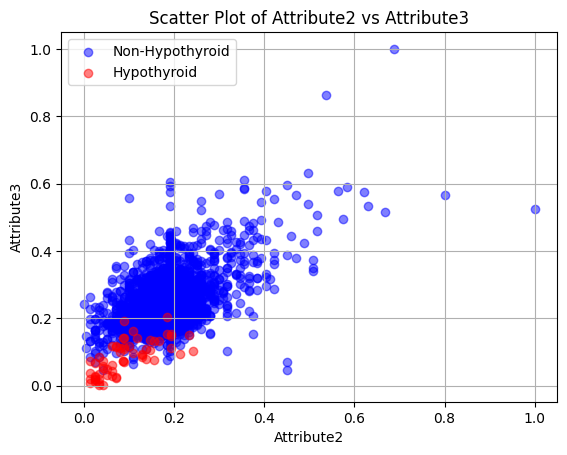

Training AUC: 0.9028
Validation AUC: 0.9370
Best Threshold for Validation F1 Score: -0.9300
Best F1 Score on Validation Set: 0.4762


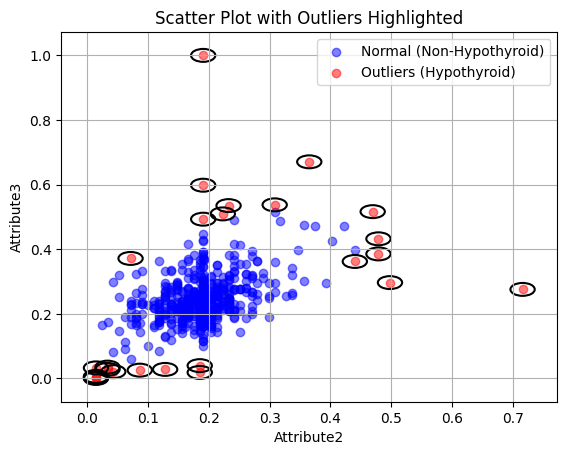

In [185]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

# Select the two features for plotting
feature_x = 'Attribute2'
feature_y = 'Attribute3'

# Scatter plot
plt.scatter(X_train[feature_x][y_train == 0], X_train[feature_y][y_train == 0], color='blue', label='Non-Hypothyroid', alpha=0.5)
plt.scatter(X_train[feature_x][y_train == 1], X_train[feature_y][y_train == 1], color='red', label='Hypothyroid', alpha=0.5)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Scatter Plot of {feature_x} vs {feature_y}')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


features = ['Attribute2', 'Attribute3']
train_data = X_train[features].values
val_data = X_valid[features].values

gm = GaussianMixture(n_components=2, random_state=0) # based on the scatter plot analysis
gm.fit(train_data)
train_scores = gm.score_samples(train_data)
val_scores = gm.score_samples(val_data)
train_auc = roc_auc_score(y_train, -1 * train_scores)
val_auc = roc_auc_score(y_valid, -1 * val_scores)

best_f1 = 0
best_threshold = None
threshold_range = np.arange(-10, 10.1, 0.01).tolist() # Make potential threshold range between -10 and 10 with 2 decimal.
for threshold in threshold_range:
    f1 = f1_score(y_valid, val_scores < threshold) # Make predictions: score less than threshold means hypothyroid (1), otherwise not-hypothyroid (0)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Training AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")
print(f"Best Threshold for Validation F1 Score: {best_threshold:.4f}")
print(f"Best F1 Score on Validation Set: {best_f1:.4f}")

outlier_preds = (val_scores < best_threshold).astype(int)
normal_data = val_data[outlier_preds == 0]
outlier_data = val_data[outlier_preds == 1]


plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', label='Normal (Non-Hypothyroid)', alpha=0.5)
plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', label='Outliers (Hypothyroid)', alpha=0.5)
for point in outlier_data:
    plt.gca().add_patch(plt.Circle((point[0], point[1]), 0.02, color='black', fill=False, lw=1.5))

plt.xlabel('Attribute2')
plt.ylabel('Attribute3')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

From the graph, the spread of non-hypothyroid points along Attribute2 suggests a distribution of likely symmetric. This kind of structure benefits from using multiple Gaussian components as it can capture the spread along Attribute2, adapting to the gradual change in density. So I choose to set component = 2

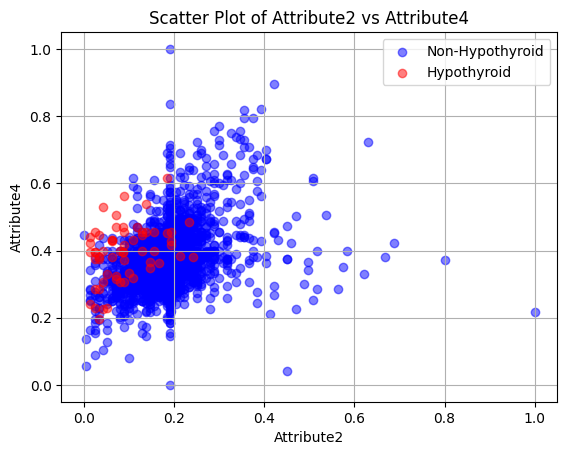

Training AUC: 0.8084
Validation AUC: 0.8922
Best Threshold for Validation F1 Score: -0.1400
Best F1 Score on Validation Set: 0.3662


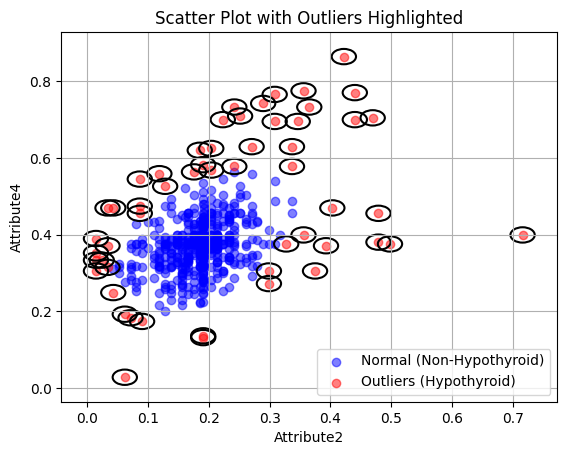

In [186]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

# Select the two features for plotting
feature_x = 'Attribute2'
feature_y = 'Attribute4'

# Scatter plot
plt.scatter(X_train[feature_x][y_train == 0], X_train[feature_y][y_train == 0], color='blue', label='Non-Hypothyroid', alpha=0.5)
plt.scatter(X_train[feature_x][y_train == 1], X_train[feature_y][y_train == 1], color='red', label='Hypothyroid', alpha=0.5)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Scatter Plot of {feature_x} vs {feature_y}')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


features = ['Attribute2', 'Attribute4']
train_data = X_train[features].values
val_data = X_valid[features].values

gm = GaussianMixture(n_components=2, random_state=0) # based on the scatter plot analysis
gm.fit(train_data)
train_scores = gm.score_samples(train_data)
val_scores = gm.score_samples(val_data)
train_auc = roc_auc_score(y_train, -1 * train_scores)
val_auc = roc_auc_score(y_valid, -1 * val_scores)

best_f1 = 0
best_threshold = None
threshold_range = np.arange(-10, 10.1, 0.01).tolist() # Make potential threshold range between -10 and 10 with 2 decimal.
for threshold in threshold_range:
    f1 = f1_score(y_valid, val_scores < threshold) # Make predictions: score less than threshold means hypothyroid (1), otherwise not-hypothyroid (0)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Training AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")
print(f"Best Threshold for Validation F1 Score: {best_threshold:.4f}")
print(f"Best F1 Score on Validation Set: {best_f1:.4f}")

outlier_preds = (val_scores < best_threshold).astype(int)
normal_data = val_data[outlier_preds == 0]
outlier_data = val_data[outlier_preds == 1]


plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', label='Normal (Non-Hypothyroid)', alpha=0.5)
plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', label='Outliers (Hypothyroid)', alpha=0.5)
for point in outlier_data:
    plt.gca().add_patch(plt.Circle((point[0], point[1]), 0.02, color='black', fill=False, lw=1.5))

plt.xlabel('Attribute2')
plt.ylabel('Attribute4')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

Based on the plot, the non-hypothyroid data shows a central with an extended spread along both. The variation in density and the elongated pattern suggest that using 2 Gaussian components might be better than 1. 

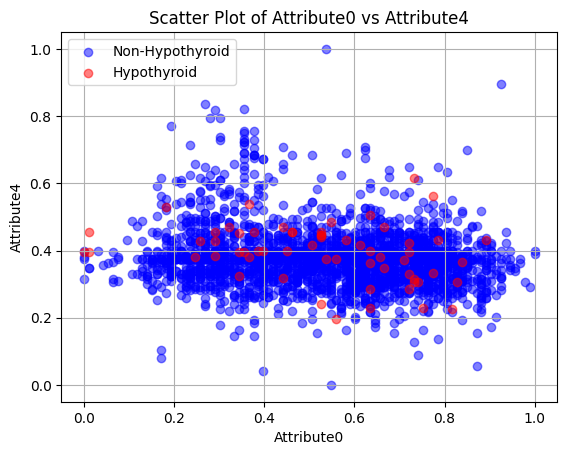

Training AUC: 0.5542
Validation AUC: 0.5953
Best Threshold for Validation F1 Score: 1.3400
Best F1 Score on Validation Set: 0.0948


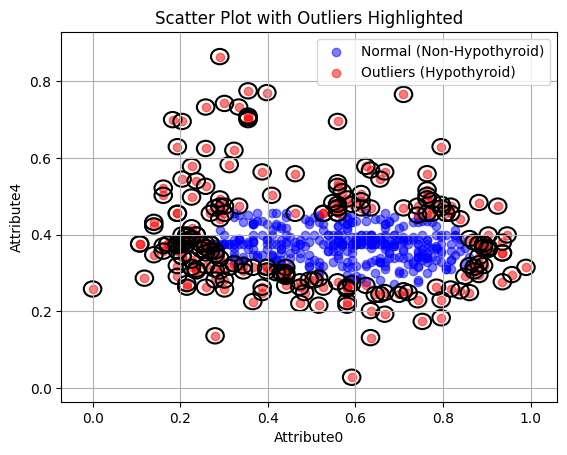

In [181]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

# Select the two features for plotting
feature_x = 'Attribute0'
feature_y = 'Attribute4'

# Scatter plot
plt.scatter(X_train[feature_x][y_train == 0], X_train[feature_y][y_train == 0], color='blue', label='Non-Hypothyroid', alpha=0.5)
plt.scatter(X_train[feature_x][y_train == 1], X_train[feature_y][y_train == 1], color='red', label='Hypothyroid', alpha=0.5)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f'Scatter Plot of {feature_x} vs {feature_y}')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


features = ['Attribute0', 'Attribute4']
train_data = X_train[features].values
val_data = X_valid[features].values

gm = GaussianMixture(n_components=2, random_state=0) # based on the scatter plot analysis
gm.fit(train_data)
train_scores = gm.score_samples(train_data)
val_scores = gm.score_samples(val_data)
train_auc = roc_auc_score(y_train, -1 * train_scores)
val_auc = roc_auc_score(y_valid, -1 * val_scores)

best_f1 = 0
best_threshold = None
threshold_range = np.arange(-10, 10.1, 0.01).tolist() # Make potential threshold range between -10 and 10 with 2 decimal.
for threshold in threshold_range:
    f1 = f1_score(y_valid, val_scores < threshold) # Make predictions: score less than threshold means hypothyroid (1), otherwise not-hypothyroid (0)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Training AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")
print(f"Best Threshold for Validation F1 Score: {best_threshold:.4f}")
print(f"Best F1 Score on Validation Set: {best_f1:.4f}")

outlier_preds = (val_scores < best_threshold).astype(int)
normal_data = val_data[outlier_preds == 0]
outlier_data = val_data[outlier_preds == 1]


plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', label='Normal (Non-Hypothyroid)', alpha=0.5)
plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', label='Outliers (Hypothyroid)', alpha=0.5)
for point in outlier_data:
    plt.gca().add_patch(plt.Circle((point[0], point[1]), 0.02, color='black', fill=False, lw=1.5))

plt.xlabel('Attribute0')
plt.ylabel('Attribute4')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

Based on the scatter plot, the non-hypothyroid data is spread out horizontally along Attribute0. With limited vertical variation on Attribute4, this pattern suggests 2 Gaussian components would likely be better at fitting the data than a single component.

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for hypothyroid and not-hypothyroid patients.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-hypothyroid patients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **hypothyroid patients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the patient is classified as hypothyroid. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the patient is hypothyroid (the patient belongs to the $G_2$ distribution which represents hypothyroid patients). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [188]:
### YOUR CODE HERE ###

# Feature Selection
feature = 'Attribute0'
val_data = X_valid[[feature]].values

# Non-Hypothyroid model
non_hypo_data = X_train[y_train == 0][[feature]].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)
S1 = G1.score_samples(val_data)

# Hypothyroid model
hypo_data = X_train[y_train == 1][[feature]].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)
S2 = G2.score_samples(val_data)

# S1 and S2 on "training set", prepare for step 5's reporting for training F1 score
S1_train = G1.score_samples(X_train[[feature]].values)
S2_train = G2.score_samples(X_train[[feature]].values)

# Optimal C
c_values = np.arange(0, 10).tolist()
best_f1_valid = 0
best_f1_train = 0
best_c = None
for c in c_values:
    train_predictions = (S1_train < c * S2_train)
    f1_train = f1_score(y_train, train_predictions)
    valid_predictions = (S1 < c * S2)
    f1_valid = f1_score(y_valid, valid_predictions)
    # Update the best c if the current F1 score is higher than the previous best
    if f1_valid > best_f1_valid: # Compare only the calidation set F1
        best_f1_valid = f1_valid
        best_f1_train = f1_train
        best_c = c

# Display the result in a table        
results_table = pd.DataFrame({
    "Feature": [feature],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_valid]
    })
results_table

,Feature,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,Attribute0,4,0.050686,0.077108


In [189]:
# Feature Selection
feature = 'Attribute1'
val_data = X_valid[[feature]].values

# Non-Hypothyroid model
non_hypo_data = X_train[y_train == 0][[feature]].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)
S1 = G1.score_samples(val_data)

# Hypothyroid model
hypo_data = X_train[y_train == 1][[feature]].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)
S2 = G2.score_samples(val_data)

# S1 and S2 on "training set", prepare for step 5's reporting for training F1 score
S1_train = G1.score_samples(X_train[[feature]].values)
S2_train = G2.score_samples(X_train[[feature]].values)

# Optimal C
c_values = np.arange(-100, 100, 0.1).tolist()
best_f1_valid = 0
best_f1_train = 0
best_c = None
for c in c_values:
    train_predictions = (S1_train < c * S2_train)
    f1_train = f1_score(y_train, train_predictions)
    valid_predictions = (S1 < c * S2)
    f1_valid = f1_score(y_valid, valid_predictions)
    # Update the best c if the current F1 score is higher than the previous best
    if f1_valid > best_f1_valid : # Compare only the calidation set F1
        best_f1_valid = f1_valid
        best_f1_train = f1_train
        best_c = c

# Display the result in a table        
results_table = pd.DataFrame({
    "Feature": [feature],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_valid]
    })
results_table

,Feature,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,Attribute1,-20.0,0.660377,0.866667


In [57]:
# Feature Selection
feature = 'Attribute2'
val_data = X_valid[[feature]].values

# Non-Hypothyroid model
non_hypo_data = X_train[y_train == 0][[feature]].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)
S1 = G1.score_samples(val_data)

# Hypothyroid model
hypo_data = X_train[y_train == 1][[feature]].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)
S2 = G2.score_samples(val_data)

# S1 and S2 on "training set", prepare for step 5's reporting for training F1 score
S1_train = G1.score_samples(X_train[[feature]].values)
S2_train = G2.score_samples(X_train[[feature]].values)

# Optimal C
c_values = np.arange(0, 1, 0.001).tolist()
best_f1_valid = 0
best_f1_train = 0
best_c = None
for c in c_values:
    train_predictions = (S1_train < c * S2_train)
    f1_train = f1_score(y_train, train_predictions)
    valid_predictions = (S1 < c * S2)
    f1_valid = f1_score(y_valid, valid_predictions)
    # Update the best c if the current F1 score is higher than the previous best
    if f1_valid > best_f1_valid: # Compare only the calidation set F1
        best_f1_valid = f1_valid
        best_f1_train = f1_train
        best_c = c

# Display the result in a table        
results_table = pd.DataFrame({
    "Feature": [feature],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_valid]
    })
results_table

,Feature,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,Attribute2,0.387,0.296943,0.444444


In [70]:
# Feature Selection
feature = 'Attribute3'
val_data = X_valid[[feature]].values

# Non-Hypothyroid model
non_hypo_data = X_train[y_train == 0][[feature]].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)
S1 = G1.score_samples(val_data)

# Hypothyroid model
hypo_data = X_train[y_train == 1][[feature]].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)
S2 = G2.score_samples(val_data)

# S1 and S2 on "training set", prepare for step 5's reporting for training F1 score
S1_train = G1.score_samples(X_train[[feature]].values)
S2_train = G2.score_samples(X_train[[feature]].values)

# Optimal C
c_values = np.arange(0, 1, 0.1).tolist()
best_f1_valid = 0
best_f1_train = 0
best_c = None
for c in c_values:
    train_predictions = (S1_train < c * S2_train)
    f1_train = f1_score(y_train, train_predictions)
    valid_predictions = (S1 < c * S2)
    f1_valid = f1_score(y_valid, valid_predictions)
    # Update the best c if the current F1 score is higher than the previous best
    if f1_valid > best_f1_valid: # Compare only the calidation set F1
        best_f1_valid = f1_valid
        best_f1_train = f1_train
        best_c = c

# Display the result in a table        
results_table = pd.DataFrame({
    "Feature": [feature],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_valid]
    })
results_table

,Feature,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,Attribute3,0.3,0.617284,0.682927


In [81]:
# Feature Selection
feature = 'Attribute4'
val_data = X_valid[[feature]].values

# Non-Hypothyroid model
non_hypo_data = X_train[y_train == 0][[feature]].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)
S1 = G1.score_samples(val_data)

# Hypothyroid model
hypo_data = X_train[y_train == 1][[feature]].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)
S2 = G2.score_samples(val_data)

# S1 and S2 on "training set", prepare for step 5's reporting for training F1 score
S1_train = G1.score_samples(X_train[[feature]].values)
S2_train = G2.score_samples(X_train[[feature]].values)

# Optimal C
c_values = np.arange(0, 1, 0.1).tolist()
best_f1_valid = 0
best_f1_train = 0
best_c = None
for c in c_values:
    train_predictions = (S1_train < c * S2_train)
    f1_train = f1_score(y_train, train_predictions)
    valid_predictions = (S1 < c * S2)
    f1_valid = f1_score(y_valid, valid_predictions)
    # Update the best c if the current F1 score is higher than the previous best
    if f1_valid > best_f1_valid: # Compare only the calidation set F1
        best_f1_valid = f1_valid
        best_f1_train = f1_train
        best_c = c

# Display the result in a table        
results_table = pd.DataFrame({
    "Feature": [feature],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_valid]
    })
results_table

,Feature,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,Attribute4,0.9,0.080734,0.117647


In [88]:
# Feature Selection
feature = 'Attribute5'
val_data = X_valid[[feature]].values

# Non-Hypothyroid model
non_hypo_data = X_train[y_train == 0][[feature]].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)
S1 = G1.score_samples(val_data)

# Hypothyroid model
hypo_data = X_train[y_train == 1][[feature]].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)
S2 = G2.score_samples(val_data)

# S1 and S2 on "training set", prepare for step 5's reporting for training F1 score
S1_train = G1.score_samples(X_train[[feature]].values)
S2_train = G2.score_samples(X_train[[feature]].values)

# Optimal C
c_values = np.arange(0, 1, 0.1).tolist()
best_f1_valid = 0
best_f1_train = 0
best_c = None
for c in c_values:
    train_predictions = (S1_train < c * S2_train)
    f1_train = f1_score(y_train, train_predictions)
    valid_predictions = (S1 < c * S2)
    f1_valid = f1_score(y_valid, valid_predictions)
    # Update the best c if the current F1 score is higher than the previous best
    if f1_valid > best_f1_valid: # Compare only the calidation set F1
        best_f1_valid = f1_valid
        best_f1_train = f1_train
        best_c = c

# Display the result in a table        
results_table = pd.DataFrame({
    "Feature": [feature],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_valid]
    })
results_table

,Feature,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,Attribute5,0.3,0.725926,0.894737


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-hypothyroid patients or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the not-hypothyroid patient, and multiple components for hypothyroid ones! Why does it make sense to have multiple components for hypothyroid patients?

In [190]:
### YOUR CODE HERE ###

# Model1: Single-GMM, 3 features: 'Attribute0', 'Attribute1', 'Attribute2' on non-hypothyroid patients

features = ['Attribute0', 'Attribute1', 'Attribute2']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a single-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)

# Fit a single-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S1_train)
val_auc = roc_auc_score(y_valid, -1 * S1_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(0, 10, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S1_train < c * S2_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S1_val < c * S2_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table1 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})

results_table1

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute0, Attribute1, Attribute2",0.966946,0.974392,1.3,0.590164,0.888889


In [196]:
# Model2: Single-GMM, 3 features: 'Attribute0', 'Attribute1', 'Attribute2' on hypothyroid patients

features = ['Attribute0', 'Attribute1', 'Attribute2']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a single-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)

# Fit a single-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S2_train)
val_auc = roc_auc_score(y_valid, -1 * S2_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-100, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S2_train < c * S1_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S2_val < c * S1_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table2 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})

results_table2

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute0, Attribute1, Attribute2",0.239412,0.309547,-100.0,0.589595,0.7


In [198]:
# Model3: Two-GMM, 3 features: 'Attribute0', 'Attribute1', 'Attribute2' on non-hypothyroid patients

features = ['Attribute0', 'Attribute1', 'Attribute2']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a single-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=2, random_state=0)
G1.fit(non_hypo_data)

# Fit a single-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=2, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S1_train)
val_auc = roc_auc_score(y_valid, -1 * S1_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-1, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S1_train < c * S2_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S1_val < c * S2_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table3 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})
results_table3

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute0, Attribute1, Attribute2",0.979627,0.990571,0.5,0.66242,0.914286


In [199]:
# Model4: Two-GMM, 3 features: 'Attribute0', 'Attribute1', 'Attribute2' on hypothyroid patients

features = ['Attribute0', 'Attribute1', 'Attribute2']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a 2-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=2, random_state=0)
G1.fit(non_hypo_data)

# Fit a 2-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=2, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S2_train)
val_auc = roc_auc_score(y_valid, -1 * S2_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-20, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S2_train < c * S1_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S2_val < c * S1_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table4 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})
results_table4

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute0, Attribute1, Attribute2",0.207527,0.429872,-20.0,0.447552,0.742857


In [200]:
# Model5: Single-GMM, 3 features: 'Attribute1', 'Attribute3', 'Attribute5' on non-hypothyroid patients

features = ['Attribute1', 'Attribute3', 'Attribute5']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a 1-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)

# Fit a 1-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S1_train)
val_auc = roc_auc_score(y_valid, -1 * S1_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-1, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S1_train < c * S2_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S1_val < c * S2_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table5 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})
results_table5

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute1, Attribute3, Attribute5",0.978312,0.982749,0.4,0.715328,0.848485


In [201]:
# Model6: 2-GMM, 3 features: 'Attribute1', 'Attribute3', 'Attribute5' on non-hypothyroid patients

features = ['Attribute1', 'Attribute3', 'Attribute5']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a 1-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=2, random_state=0)
G1.fit(non_hypo_data)

# Fit a 1-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=2, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S1_train)
val_auc = roc_auc_score(y_valid, -1 * S1_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-1, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S1_train < c * S2_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S1_val < c * S2_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table6 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})
results_table6

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute1, Attribute3, Attribute5",0.982945,0.988107,0.6,0.830769,0.914286


In [202]:
# Model7: 3-GMM, 3 features: 'Attribute1', 'Attribute3', 'Attribute5' on non-hypothyroid patients

features = ['Attribute1', 'Attribute3', 'Attribute5']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a 3-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=3, random_state=0)
G1.fit(non_hypo_data)

# Fit a 1-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=3, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S1_train)
val_auc = roc_auc_score(y_valid, -1 * S1_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-1, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S1_train < c * S2_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S1_val < c * S2_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table7 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})
results_table7

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute1, Attribute3, Attribute5",0.989054,0.994643,0.5,0.899225,0.944444


In [203]:
# Model8: Single-GMM, 3 features: 'Attribute1', 'Attribute3', 'Attribute5' on hypothyroid patients

features = ['Attribute1', 'Attribute3', 'Attribute5']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a 1-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=1, random_state=0)
G1.fit(non_hypo_data)

# Fit a 1-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=1, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S2_train)
val_auc = roc_auc_score(y_valid, -1 * S2_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-20, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S2_train < c * S1_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S2_val < c * S1_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table8 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})
results_table8

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute1, Attribute3, Attribute5",0.049244,0.08036,-20.0,0.479167,0.52


In [204]:
# Model9: 2-GMM, 3 features: 'Attribute1', 'Attribute3', 'Attribute5' on hypothyroid patients

features = ['Attribute1', 'Attribute3', 'Attribute5']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a 1-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=2, random_state=0)
G1.fit(non_hypo_data)

# Fit a 1-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=2, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S2_train)
val_auc = roc_auc_score(y_valid, -1 * S2_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-100, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S2_train < c * S1_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S2_val < c * S1_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table9 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})
results_table9

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute1, Attribute3, Attribute5",0.040764,0.183757,-100.0,0.462687,0.604651


In [206]:
# Model10: 3-GMM, 3 features: 'Attribute1', 'Attribute3', 'Attribute5' on hypothyroid patients

features = ['Attribute1', 'Attribute3', 'Attribute5']
train_data = X_train[features].values
val_data = X_valid[features].values

# Fit a 1-component Gaussian model on non-hypothyroid patients
non_hypo_data = X_train[y_train == 0][features].values
G1 = GaussianMixture(n_components=3, random_state=0)
G1.fit(non_hypo_data)

# Fit a 1-component Gaussian model on hypothyroid patients
hypo_data = X_train[y_train == 1][features].values
G2 = GaussianMixture(n_components=3, random_state=0)
G2.fit(hypo_data)

# Calculate scores for both training and validation sets
S1_train = G1.score_samples(train_data)
S2_train = G2.score_samples(train_data)
S1_val = G1.score_samples(val_data)
S2_val = G2.score_samples(val_data)

# Calculate AUC for both training and validation sets
train_auc = roc_auc_score(y_train, -1 * S2_train)
val_auc = roc_auc_score(y_valid, -1 * S2_val)

# Find the best F1 score by optimizing the threshold c
c_values = np.arange(-100, 1, 0.1)
best_f1_val = 0
best_f1_train = 0
best_c = None

for c in c_values:
    train_predictions = (S2_train < c * S1_train).astype(int)
    f1_train = f1_score(y_train, train_predictions)
    
    val_predictions = (S2_val < c * S1_val).astype(int)
    f1_val = f1_score(y_valid, val_predictions)
    
    # Update the best F1 score if the current one is higher
    if f1_val > best_f1_val:
        best_f1_val = f1_val
        best_f1_train = f1_train
        best_c = c

# Create a results table
results_table10 = pd.DataFrame({
    "Features": [", ".join(features)],
    "Train AUC": [train_auc],
    "Validation AUC": [val_auc],
    "Optimal c": [best_c],
    "Best F1 Score (Training)": [best_f1_train],
    "Best F1 Score (Validation)": [best_f1_val]
})
results_table10

,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,"Attribute1, Attribute3, Attribute5",0.011645,0.114004,-100.0,0.495726,0.742857


1 2 3 4 - V012 Component 1,2 for non and hypo
5 6 7 - V135 Component 1,2,3 for non
8 9 10  -  V135 Component 1,2,3 for hypo

In [208]:
# List of all result tables
re_list = [results_table1, results_table2, results_table3, results_table4, results_table5, results_table6, results_table7, results_table8, results_table9, results_table10]


model_names = [f"mod{i+1}" for i in range(10)]
for i, df in enumerate(re_list):
    if 'Model Name' in df.columns:
        df.drop(columns=['Model Name'], inplace=True)
    # Add the model names to each DataFrame in the list
    df.insert(0, 'Model Name', model_names[i])

# Combine all DataFrames into a single summary table
summary_table = pd.concat(re_list, ignore_index=True)
# Sort the table by 'Best F1 Score (Validation)' in descending order
sorted_summary_table = summary_table.sort_values(by='Best F1 Score (Validation)', ascending=False).reset_index(drop=True)

sorted_summary_table


,Model Name,Features,Train AUC,Validation AUC,Optimal c,Best F1 Score (Training),Best F1 Score (Validation)
0,mod7,"Attribute1, Attribute3, Attribute5",0.989054,0.994643,0.5,0.899225,0.944444
1,mod3,"Attribute0, Attribute1, Attribute2",0.979627,0.990571,0.5,0.662420,0.914286
2,mod6,"Attribute1, Attribute3, Attribute5",0.982945,0.988107,0.6,0.830769,0.914286
3,mod1,"Attribute0, Attribute1, Attribute2",0.966946,0.974392,1.3,0.590164,0.888889
4,mod5,"Attribute1, Attribute3, Attribute5",0.978312,0.982749,0.4,0.715328,0.848485
5,mod4,"Attribute0, Attribute1, Attribute2",0.207527,0.429872,-20.0,0.447552,0.742857
6,mod10,"Attribute1, Attribute3, Attribute5",0.011645,0.114004,-100.0,0.495726,0.742857
7,mod2,"Attribute0, Attribute1, Attribute2",0.239412,0.309547,-100.0,0.589595,0.700000
8,mod9,"Attribute1, Attribute3, Attribute5",0.040764,0.183757,-100.0,0.462687,0.604651
9,mod8,"Attribute1, Attribute3, Attribute5",0.049244,0.080360,-20.0,0.479167,0.520000


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [209]:
### YOUR CODE HERE ###
from sklearn.metrics import precision_score, recall_score

features = ['Attribute1', 'Attribute3', 'Attribute5']
train_data = X_train[y_train == 0][features].values # Only non-hypothyroid patients
GMM_3 = GaussianMixture(n_components=3, random_state=0)
GMM_3.fit(train_data)

test_data = X_test[features].values
test_scores = GMM_3.score_samples(test_data)

c_values = np.arange(0, 10, 0.01)  # Define a range for c
best_f1_test = 0
best_c = None
for c in c_values:
    test_predictions = (test_scores < c).astype(int)
    f1 = f1_score(y_test, test_predictions)
    if f1 > best_f1_test:
        best_f1_test = f1
        best_c = c

# Use the best c to make final predictions on the test set
final_test_predictions = (test_scores < best_c).astype(int)

# Calculate Precision, Recall, and F1 Score for the test set
test_f1 = f1_score(y_test, final_test_predictions)
test_precision = precision_score(y_test, final_test_predictions)
test_recall = recall_score(y_test, final_test_predictions)

# Report the metrics
result = pd.DataFrame({
    "Metric": ["Optimal c", "F1 Score", "Precision", "Recall"],
    "Value": [best_c, test_f1, test_precision, test_recall]
})
result


,Metric,Value
0,Optimal c,1.380000
1,F1 Score,0.764706
2,Precision,0.684211
3,Recall,0.866667


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.


1. Exponential Distribution
Model the time between events in a Poisson process, where events occur continuously and independently at a constant average rate.  
When to Use: If the data represents time-to-event or inter-arrival times, and it exhibits a high probability near zero and decays exponentially. It can be used to model waiting times, such as the time until a customer arrives or until a system fails.

2. Log-Normal Distribution
If a variable's natural logarithm is normally distributed, then the variable is said to follow a log-normal distribution.  
When to Use: Useful when data is positively skewed and can only take positive values, often seen in financial data, biological measurements, and other naturally occurring phenomena.
This distribution is popular in Stock prices, income distribution, and durations of events.

3. Gamma Distribution
Model the sum of multiple exponential random variables and is often used to represent waiting times or life data.  
When to Use: If the data is continuous, non-negative and skewed. Often be used to model waiting times or failure times. Very popular when Modeling insurance claims, rainfall amounts, and failure rates in reliability engineering.

4. Beta Distribution
A distribution defined on the interval [0, 1], often used to model probabilities or proportions.  
When to Use: When dealing with data that is bounded between 0 and 1, such as probabilities, percentages, or proportions. This distribution is popular on modeling probabilities of success, percentage of a budget spent, or rates of return.

5. Weibull Distribution
It's a flexible distribution used in reliability analysis and life data analysis, often used to model lifetimes.  
When to Use: If the data is skewed and non-negative, such as dealing with life data, survival analysis, or time-to-failure data. Weibull model is popular on failure rates of machinery, wind speed distributions, and duration of phone calls.

For our data in this case, gaussian model looks good. If we want to explore if other distributions are also suitable for modeling our data, visual analysis, is an important process to determine the model disytribution. For example, plotting a histogram to help  visually assess whether the data is symmetric, skewed, or has multiple peaks, plotting Q-Q Plots to see how well the data matches a particular theoretical distribution. If your data fits the distribution, the points will lie approximately along a straight line. Also, if data has complex distribution, we may need to try multiple model with different distribution

Reference:   
https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/  
https://medium.com/@amanatulla1606/when-normal-just-wont-cut-it-understanding-and-utilizing-non-gaussian-distributions-9fb0d8e249a3